Index(['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'windspeedmean', 'sealevelpressure', 'cloudcover', 'BarajDoluluk',
       'dakika'],
      dtype='object')
            temp  feelslike  dew  humidity   precip  windspeedmean  \
datetime                                                             
2011-01-01   0.4       -3.3 -2.7      80.8    0.000           12.4   
2011-01-02   1.8       -0.9 -0.2      87.0    0.000            9.5   
2011-01-03   1.9       -2.2  0.8      92.4  102.387           17.9   
2011-01-04  -0.3       -4.9 -3.8      77.4    4.221           16.8   
2011-01-05  -0.1       -2.7 -2.7      83.1   91.425            8.5   

            sealevelpressure  cloudcover  BarajDoluluk  dakika  weighted_score  
datetime                                                                        
2011-01-01            1019.1         1.1        0.9419     551        175.8200  
2011-01-02            1014.7        36.0        0.9311     551        179.0050  
20

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

                               SARIMAX Results                                
Dep. Variable:           BarajDoluluk   No. Observations:                 3323
Model:                 ARIMA(4, 1, 2)   Log Likelihood               10157.763
Date:                Wed, 01 Jan 2025   AIC                         -20301.525
Time:                        22:23:46   BIC                         -20258.767
Sample:                    01-01-2011   HQIC                        -20286.225
                         - 02-05-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2390      0.562      0.425      0.671      -0.862       1.340
ar.L2          0.7965      0.622      1.282      0.200      -0.422       2.015
ar.L3         -0.1315      0.073     -1.809      0.0

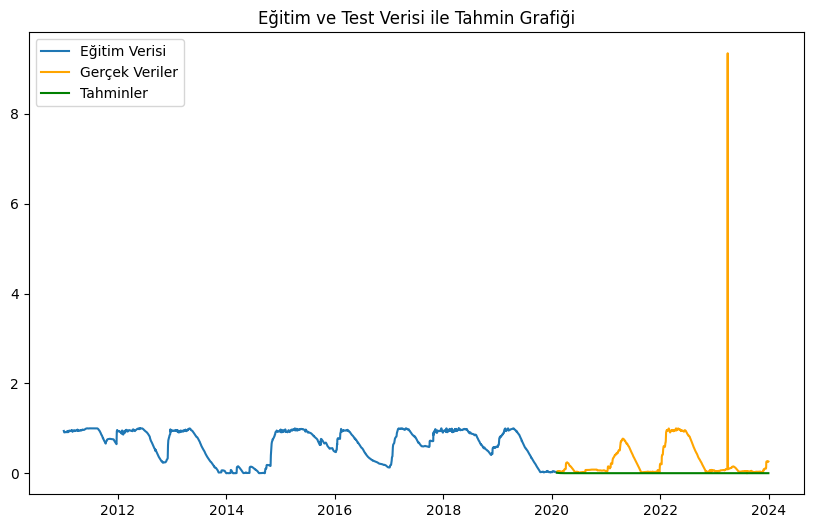

Mean Squared Error (MSE): 0.22155281807849755
Root Mean Squared Error (RMSE): 0.4706939749757772
Mean Absolute Error (MAE): 0.2597595569607
Mean Absolute Percentage Error (MAPE): 0.9667523405998343%
R²: -0.4383804357455361
Eğitim Süreti: 6.880452632904053 saniye
Çıkarım Süreti: 0.06707477569580078 saniye


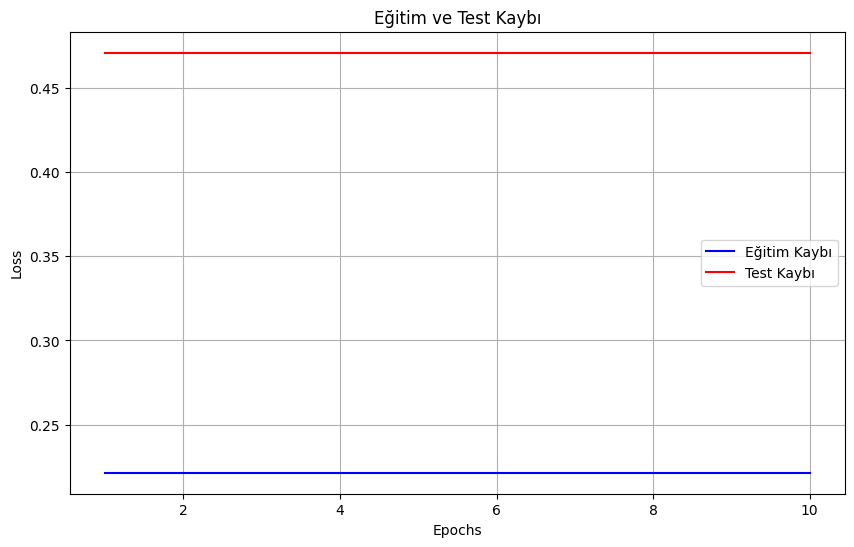

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import time

# ARIMA MODELLEMESI
df = pd.read_excel('pabuçderekullan.xlsx')
print(df.columns)

# Tarih sütununu datetime formatına çevirin
df['datetime'] = pd.to_datetime(df['datetime'])

# Veriyi tarihe göre sıralama
df = df.sort_values(by='datetime')

# Ağırlıkları belirleyin
weights = {
    'temp': 0.4,
    'feelslike': 0.3,
    'dew': 0.05,
    'humidity': 0.1,
    'precip': 0.7,
    'windspeedmean': 0.05,
    'sealevelpressure': 0.1,
    'cloudcover': 0.05,
    'dakika': 0.12
}

# Baraj doluluk yüzdesi ve diğer bağımsız değişkenler
df = df[['datetime', 'temp', 'feelslike', 'dew', 'humidity', 'precip',
       'windspeedmean', 'sealevelpressure', 'cloudcover', 'BarajDoluluk',
       'dakika']]

# Ağırlıklı skor hesaplama
df['weighted_score'] = (weights['temp'] * df['temp'] +
                        weights['feelslike'] * df['feelslike'] +
                        weights['dew'] * df['dew'] +
                        weights['humidity'] * df['humidity'] +
                        weights['precip'] * df['precip'] +
                        weights['windspeedmean'] * df['windspeedmean'] +
                        weights['sealevelpressure'] * df['sealevelpressure'] +
                        weights['cloudcover'] * df['cloudcover'] +
                        weights['dakika'] * df['dakika'])

# Tarihi indeks olarak ayarlayın
df.set_index('datetime', inplace=True)

# Veriye göz atın
print(df.head())

# Baraj doluluk yüzdesi kolonunu hedef olarak seçin
y = df['BarajDoluluk']

# Veriyi eğitim ve test setlerine ayırın (shuffle=False)
train, test = train_test_split(y, test_size=0.3, shuffle=False)

# Eğitim ve test zamanlaması
start_time = time.time()  # Eğitim zamanını başlatma

# ARIMA modelini tanımlayın
model = ARIMA(train, order=(4,1,2)) #2 yıla göre tahmin eder 1 fark ile q=2 ise geçmiş hatalarla ilgilenmedir

# Modeli eğitin
model_fit = model.fit()

# Eğitim süreti
end_time = time.time()
training_time = end_time - start_time  # Eğitim süreti hesaplama

# Modelin özetine göz atın
print(model_fit.summary())

# Test verisi üzerinde tahmin yapın
start_inference_time = time.time()  # Çıkarım (inference) zamanını başlatma
predictions = model_fit.forecast(steps=len(test))
end_inference_time = time.time()
inference_time = end_inference_time - start_inference_time  # Çıkarım süreti

# Tahminleri görselleştirelim
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Eğitim Verisi')
plt.plot(test.index, test, label='Gerçek Veriler', color='orange')
plt.plot(test.index, predictions, label='Tahminler', color='green')
plt.legend()
plt.title('Eğitim ve Test Verisi ile Tahmin Grafiği')
plt.show()

# Modelin başarımını değerlendirelim
mse = mean_squared_error(test, predictions)
mse_rmse = np.sqrt(mse)  # RMSE
mae = mean_absolute_error(test, predictions)  # MAE
mape = mean_absolute_percentage_error(test, predictions)  # MAPE
r2 = r2_score(test, predictions)  # R²

# Sonuçları yazdırma
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {mse_rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
print(f'R²: {r2}')
print(f'Eğitim Süreti: {training_time} saniye')
print(f'Çıkarım Süreti: {inference_time} saniye')

# Sonuçları Excel dosyasına kaydetme
result_df = pd.DataFrame({
    'Gerçek Değerler': test,
    'Tahminler': predictions
})

result_df.to_excel("baraj_doluluk_tahminleri.xlsx", index=True)

# Kaybın (Loss) Grafiği
epochs = 10
train_losses = [mse] * epochs
test_losses = [mse_rmse] * epochs

plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label="Eğitim Kaybı", color='blue')
plt.plot(range(1, epochs + 1), test_losses, label="Test Kaybı", color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Eğitim ve Test Kaybı")
plt.legend()
plt.grid(True)
plt.show()